# Assignment 16.4 - Outliers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize
%matplotlib inline


warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [2]:
useducation_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


In [3]:
useducation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

Fill missing values.

In [4]:
useducation_df.dropna(inplace=True)

### 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

Let's analyze the data for outliers using basic boxplots

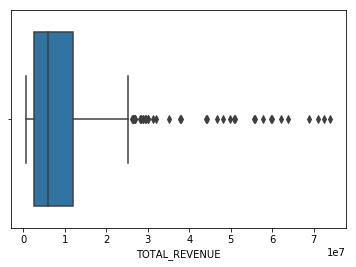

In [5]:
sns.boxplot(x='TOTAL_REVENUE', data=useducation_df)
plt.show()

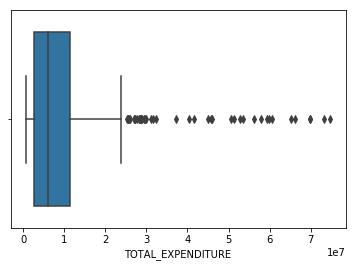

In [6]:
sns.boxplot(x='TOTAL_EXPENDITURE', data=useducation_df)
plt.show()

These plots clearly indicate that there are outliers in each series.

### 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

We'll eliminate the outliers using winsorize.

In [7]:
winsorized_revenue = winsorize(useducation_df["TOTAL_REVENUE"], (0, 0.05))
winsorized_expenditure = winsorize(useducation_df["TOTAL_EXPENDITURE"], (0, 0.05))

### 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [19]:
budget_deficit = useducation_df.TOTAL_EXPENDITURE - useducation_df.TOTAL_REVENUE

{'boxes': [<matplotlib.lines.Line2D at 0x7f2e9bdc6668>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2e9bdd1198>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e9bdd1eb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e9bdd1a58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2e9bdc67b8>,
  <matplotlib.lines.Line2D at 0x7f2e9bdc6cf8>]}

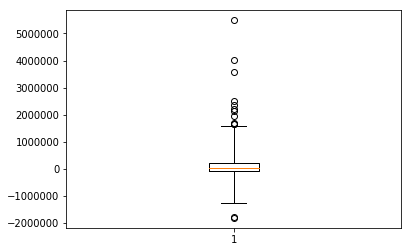

In [20]:
plt.boxplot(budget_deficit, whis=5)

In [23]:
winsorize_budget_deficit = winsorize(budget_deficit, (0, 0.05))

{'boxes': [<matplotlib.lines.Line2D at 0x7f2e9c0b42b0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2e9c0ae1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e9c098c18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e9c0aeeb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2e9c0b4940>,
  <matplotlib.lines.Line2D at 0x7f2e9c0b4c88>]}

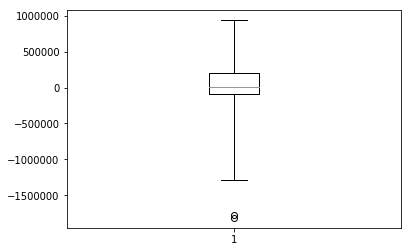

In [24]:
plt.boxplot(winsorize_budget_deficit, whis=5)

### 4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. But this time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [29]:
budget_deficit2 = winsorized_revenue - winsorized_expenditure 

{'boxes': [<matplotlib.lines.Line2D at 0x7f2e9e275a20>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2e9bd07550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e9bd0f2b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e9bd07e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2e9e275b70>,
  <matplotlib.lines.Line2D at 0x7f2e9bd070f0>]}

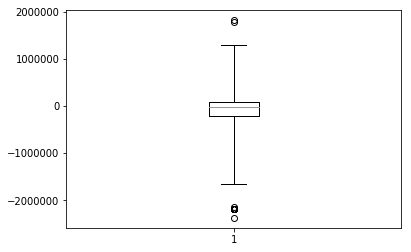

In [30]:
plt.boxplot(budget_deficit2, whis=5)

In [31]:
winsorized_budget_deficit2 = winsorize(budget_deficit2, (0, 0.05))

{'boxes': [<matplotlib.lines.Line2D at 0x7f2e9bcde7b8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2e9bce52e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e9bced048>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e9bce5ba8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2e9bcde908>,
  <matplotlib.lines.Line2D at 0x7f2e9bcdee48>]}

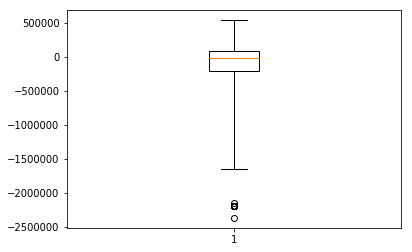

In [32]:
plt.boxplot(winsorized_budget_deficit2, whis=5)

### 5. Compare some basic statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

In [34]:
pd.DataFrame({"original_budget": budget_deficit, "winsorized_budget1": winsorize_budget_deficit,
              "winsorized_budget2": winsorized_budget_deficit2}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,4.130000e+02,4.130000e+02,4.130000e+02
mean,1.073359e+05,5.479249e+04,-1.618164e+05
std,6.026989e+05,3.934563e+05,5.829723e+05
min,-1.816932e+06,-1.816932e+06,-2.372929e+06
25%,-8.356300e+04,-8.356300e+04,-2.125430e+05
50%,1.455000e+04,1.455000e+04,-1.575500e+04
75%,2.051510e+05,2.051510e+05,8.197400e+04
max,5.487742e+06,9.401870e+05,5.400550e+05


### 6. If our variable of interest is the budget deficit variable, which method do you think is the most appropriate one in dealing with the outliers in this variable. The method in the third question or the one in the fourth question?

The third approach produces a more desirable outcome because we want to eliminate outliers based on the original data. 